In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import copy
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

import warnings

## Suppress warnings on console
warnings.filterwarnings("default", category=DeprecationWarning)

In [2]:
# Reading input file

input_file = pd.read_csv('./Final_Files/sample_refined_updated.csv')

# Shuffle data frame

input_file = input_file.sample(frac=1)
input_file.head()

,acousticness,analysis_url,danceability,duration_ms,energy,track_id,instrumentalness,key,liveness,loudness,...,track_href,type,uri,valence,artist_name,track_name,popularity,bbhot,artist_popularity,artist_followers
4220,0.4100,https://api.spotify.com/v1/audio-analysis/33SH...,0.694,244189,0.4720,33SH8ZC36EzoRstHbaFE72,0.00000,8,0.2330,-8.620,...,https://api.spotify.com/v1/tracks/33SH8ZC36Ezo...,audio_features,spotify:track:33SH8ZC36EzoRstHbaFE72,0.467,Boyce Avenue,Closer,59,1,76,2203100
2210,0.6480,https://api.spotify.com/v1/audio-analysis/493X...,0.660,141310,0.3610,493XhtluGD22qDWYLYHxhy,0.00000,8,0.4750,-8.880,...,https://api.spotify.com/v1/tracks/493XhtluGD22...,audio_features,spotify:track:493XhtluGD22qDWYLYHxhy,0.676,Hobo Johnson,Father,57,1,61,285603
1143,0.0906,https://api.spotify.com/v1/audio-analysis/7vl6...,0.441,200813,0.6370,7vl6ANTdLHg94AvCYXiSIw,0.00000,3,0.0951,-7.025,...,https://api.spotify.com/v1/tracks/7vl6ANTdLHg9...,audio_features,spotify:track:7vl6ANTdLHg94AvCYXiSIw,0.472,JRY,Pray,60,1,48,1719
1109,0.0892,https://api.spotify.com/v1/audio-analysis/0elC...,0.450,261734,0.6020,0elCmyfISzkP5tAYTVuYjS,0.00622,6,0.1030,-4.308,...,https://api.spotify.com/v1/tracks/0elCmyfISzkP...,audio_features,spotify:track:0elCmyfISzkP5tAYTVuYjS,0.160,Flipturn,August,49,1,43,5843
1681,0.9930,https://api.spotify.com/v1/audio-analysis/5cpH...,0.326,175935,0.0038,5cpH1u4FeSQg3mZ7dRb1mj,0.95000,10,0.1270,-30.011,...,https://api.spotify.com/v1/tracks/5cpH1u4FeSQg...,audio_features,spotify:track:5cpH1u4FeSQg3mZ7dRb1mj,0.373,Sub-City Keys,Demi Sec,68,0,57,845


In [3]:
## Dropping fields (strings/objects)

'''
drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
             'artist_name', 'track_name']
'''
drop_list = ['analysis_url','track_id', 'track_href', 'type', 'uri', 
             'artist_name', 'track_name', 'time_signature', 'popularity']


train = input_file.drop(drop_list, axis = 1)


train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 4220 to 95
Data columns (total 15 columns):
acousticness         5000 non-null float64
danceability         5000 non-null float64
duration_ms          5000 non-null int64
energy               5000 non-null float64
instrumentalness     5000 non-null float64
key                  5000 non-null int64
liveness             5000 non-null float64
loudness             5000 non-null float64
mode                 5000 non-null int64
speechiness          5000 non-null float64
tempo                5000 non-null float64
valence              5000 non-null float64
bbhot                5000 non-null int64
artist_popularity    5000 non-null int64
artist_followers     5000 non-null int64
dtypes: float64(9), int64(6)
memory usage: 625.0 KB


In [4]:
## Making a copy of dataframe target variable and assigning it to Y
Y = copy.deepcopy(train.bbhot)
#Y.shape

## Dropping the target attribute and making new dataframe

train_1 = train.drop("bbhot", axis=1)
#train_1.head()


In [5]:
## Creating standard scaler object

#scaler = StandardScaler()

scaler = MinMaxScaler()

## Fit scaler to features

scaler.fit(train_1)

# Transform features to scaled version

scaled_features = scaler.transform(train_1)

#Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

df_feat = pd.DataFrame(scaled_features,columns=train_1.columns)
df_feat.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,artist_followers
0,0.411645,0.713992,0.158211,0.472470,0.00000,0.727273,0.222431,0.781097,1.0,0.029089,0.431633,0.471717,0.76,0.050429
1,0.650601,0.679012,0.080314,0.361147,0.00000,0.727273,0.474672,0.774928,0.0,0.355072,0.365426,0.682828,0.61,0.006538
2,0.090961,0.453704,0.125368,0.637950,0.00000,0.272727,0.078695,0.818945,0.0,0.057764,0.375236,0.476768,0.48,0.000039
3,0.089555,0.462963,0.171496,0.602848,0.00622,0.545455,0.086929,0.883418,1.0,0.028261,0.782602,0.161616,0.43,0.000134
4,0.996988,0.335391,0.106531,0.002908,0.95000,0.909091,0.111945,0.273504,0.0,0.061491,0.317371,0.376768,0.57,0.000019


In [6]:
## Training a NB model without cross validation

from sklearn.metrics import classification_report,confusion_matrix

X = df_feat
y = Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

warnings.filterwarnings("ignore")


gnb = GaussianNB()

gnb.fit(X_train,y_train)

predictions = gnb.predict(X_test)

accuracy = gnb.score(X_test, y_test)

print("Prediction Accuracy Without Cross Validation: %.2f%%" % (accuracy * 100.0))

print("Confusion Matrix: ")
print(confusion_matrix(y_test,predictions))

print("Classification Matrix: ")
print(classification_report(y_test,predictions))




Prediction Accuracy Without Cross Validation: 55.07%
Confusion Matrix: 
[[351 414]
 [260 475]]
Classification Matrix: 
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       765
           1       0.53      0.65      0.58       735

   micro avg       0.55      0.55      0.55      1500
   macro avg       0.55      0.55      0.55      1500
weighted avg       0.55      0.55      0.55      1500



In [7]:
## Function to evaluate model by applying cross validation

def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

In [8]:
## Implementing Naive Bayes with Cross Validation

#gnb = GaussianNB()
#gnb = BernoulliNB()
#gnb = MultinomialNB()


gnb.fit(df_feat, Y)

acc_nb = testingModel(gnb, df_feat, Y)

print("Prediction Accuracy With 10-Fold Cross Validation(Mean Value): %.2f%%" % (acc_nb * 100.0))

#print(classification_report(y_test,predictions))

#print(confusion_matrix(y_test,predictions))



Scores: [0.613984 0.6124   0.601152 0.67392  0.619392 0.668432 0.61096  0.631504
 0.596368 0.643744]
Mean: 0.6271856
Standard Deviation: 0.02553933857874949
Prediction Accuracy With 10-Fold Cross Validation(Mean Value): 62.72%


In [9]:
print("Hyperparameters: ",gnb.get_params)

Hyperparameters:  <bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>


AttributeError: 'AxesSubplot' object has no attribute 'value_counts'

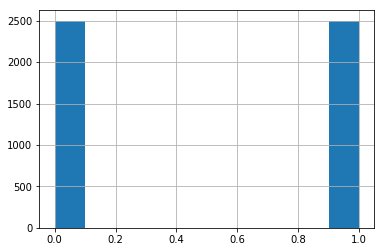

In [20]:
train['bbhot'].hist().value_counts()